In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('BTC-USD.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2747,2022-03-26,44349.859375,44735.996094,44166.273438,44500.828125,44500.828125,16950455995
2748,2022-03-27,44505.355469,46827.546875,44437.292969,46820.492188,46820.492188,28160889722
2749,2022-03-28,46821.851563,48086.835938,46690.203125,47128.003906,47128.003906,36362175703
2750,2022-03-29,47100.437500,48022.289063,47100.437500,47465.730469,47465.730469,31397059069
2751,2022-03-30,47375.777344,47544.847656,46759.917969,47127.250000,47127.250000,31972411392


In [3]:
data_training = data[data['Date']< '2022-03-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2717,2022-02-24,37278.566406,38968.839844,34459.218750,38332.609375,38332.609375,46383802093
2718,2022-02-25,38333.746094,39630.324219,38111.343750,39214.218750,39214.218750,26545599159
2719,2022-02-26,39213.082031,40005.347656,38702.535156,39105.148438,39105.148438,17467554129
2720,2022-02-27,39098.699219,39778.941406,37268.976563,37709.785156,37709.785156,23450127612


In [4]:
data_test = data[data['Date']> '2022-03-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
2723,2022-03-02,44357.617188,45077.578125,43432.851563,43924.117188,43924.117188,29183112630
2724,2022-03-03,43925.195313,44021.578125,41914.750000,42451.789063,42451.789063,24967782593
2725,2022-03-04,42458.140625,42479.613281,38805.847656,39137.605469,39137.605469,28516271427
2726,2022-03-05,39148.449219,39566.335938,38777.035156,39400.585938,39400.585938,16975917450
2727,2022-03-06,39404.199219,39640.175781,38211.648438,38419.984375,38419.984375,19745229902
2728,2022-03-07,38429.304688,39430.226563,37260.203125,38062.039063,38062.039063,28546143503
2729,2022-03-08,38059.902344,39304.441406,37957.386719,38737.269531,38737.269531,25776583476
2730,2022-03-09,38742.816406,42465.671875,38706.093750,41982.925781,41982.925781,32284121034
2731,2022-03-10,41974.070313,42004.726563,38832.941406,39437.460938,39437.460938,31078064711
2732,2022-03-11,39439.968750,40081.679688,38347.433594,38794.972656,38794.972656,26364890465


In [5]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,26580100


In [8]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[4.28907290e-03, 3.73944128e-03, 4.24270741e-03, 4.14358659e-03,
        4.31449241e-05],
       [4.15542811e-03, 3.57446063e-03, 3.64887469e-03, 3.65546320e-03,
        8.14009147e-05],
       [3.66922344e-03, 3.15121937e-03, 3.21734240e-03, 3.21556748e-03,
        9.11925723e-05],
       ...,
       [5.79405389e-01, 5.80268864e-01, 5.81946891e-01, 5.77649234e-01,
        4.97536435e-02],
       [5.77707630e-01, 5.76967418e-01, 5.60295378e-01, 5.56943051e-01,
        6.67998565e-02],
       [5.57036106e-01, 6.35025713e-01, 5.64059707e-01, 6.38313476e-01,
        1.01675101e-01]])

In [9]:
X_train = []
Y_train = []

In [10]:
training_data.shape[0]

2722

In [11]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])

In [12]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [13]:
X_train.shape

(2662, 60, 5)

In [14]:
#Building LSTM
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [15]:
regressor = Sequential()
regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units =1))

In [17]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            11200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_5 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_6 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [18]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
regressor.fit(X_train, Y_train, epochs = 20, batch_size =50)

Epoch 1/20
54/54 [==============================] - 18s 221ms/step - loss: 0.0218
Epoch 2/20
54/54 [==============================] - 11s 210ms/step - loss: 0.0044
Epoch 3/20
54/54 [==============================] - 11s 212ms/step - loss: 0.0040
Epoch 4/20
54/54 [==============================] - 12s 214ms/step - loss: 0.0037
Epoch 5/20
54/54 [==============================] - 12s 225ms/step - loss: 0.0040
Epoch 6/20
54/54 [==============================] - 12s 217ms/step - loss: 0.0037
Epoch 7/20
54/54 [==============================] - 12s 218ms/step - loss: 0.0030
Epoch 8/20
54/54 [==============================] - 12s 216ms/step - loss: 0.0036
Epoch 9/20
54/54 [==============================] - 12s 220ms/step - loss: 0.0032
Epoch 10/20
54/54 [==============================] - 12s 222ms/step - loss: 0.0028
Epoch 11/20
54/54 [==============================] - 12s 212ms/step - loss: 0.0031
Epoch 12/20
54/54 [==============================] - 11s 211ms/step - loss: 0.0028
Epoch 13/20
5

In [20]:
#Test Dataset
past_60_days = data_training.tail(60)
df= past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,47169.371094,48472.527344,45819.953125,46306.445313,36974172400
1,46311.746094,47827.312500,46288.484375,47686.812500,24582667004
2,47680.925781,47881.406250,46856.937500,47345.218750,27951569547
3,47343.542969,47510.726563,45835.964844,46458.117188,33071628362
4,46458.851563,47406.546875,45752.464844,45897.574219,42494677905


In [21]:
inputs = scaler.transform(df)
inputs

array([[4.71693711e+04, 4.84725273e+04, 4.58199531e+04, 4.63064453e+04,
        3.69741724e+10],
       [4.63117461e+04, 4.78273125e+04, 4.62884844e+04, 4.76868125e+04,
        2.45826670e+10],
       [4.76809258e+04, 4.78814063e+04, 4.68569375e+04, 4.73452188e+04,
        2.79515695e+10],
       [4.73435430e+04, 4.75107266e+04, 4.58359648e+04, 4.64581172e+04,
        3.30716284e+10],
       [4.64588516e+04, 4.74065469e+04, 4.57524648e+04, 4.58975742e+04,
        4.24946779e+10],
       [4.58993594e+04, 4.69290469e+04, 4.27982227e+04, 4.35690039e+04,
        3.68510849e+10],
       [4.35655117e+04, 4.37487188e+04, 4.26455391e+04, 4.31609297e+04,
        3.02080483e+10],
       [4.31535703e+04, 4.31535703e+04, 4.10774453e+04, 4.15579023e+04,
        8.41966075e+10],
       [4.15614648e+04, 4.22289414e+04, 4.06722773e+04, 4.17339414e+04,
        2.80663558e+10],
       [4.17347266e+04, 4.26639492e+04, 4.13381602e+04, 4.19116016e+04,
        2.12943844e+10],
       [4.19102305e+04, 4.2199

In [22]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [23]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((29, 60, 5), (29,))

In [24]:
Y_pred = regressor.predict(X_test)
Y_pred, Y_test

(array([[6.2941840e+13],
        [3.5018368e+13],
        [4.6687673e+12],
        [7.4318789e+13],
        [1.2940826e+13],
        [9.4402945e+13],
        [8.8239164e+13],
        [8.6029479e+12],
        [7.0687159e+13],
        [4.4374897e+13],
        [3.2311697e+13],
        [2.7881181e+13],
        [1.0803590e+13],
        [2.2366495e+13],
        [1.5135090e+13],
        [2.7447951e+13],
        [7.4157694e+13],
        [5.9310806e+13],
        [2.8329753e+13],
        [1.8757397e+13],
        [4.2556054e+13],
        [2.0853593e+13],
        [1.5286295e+13],
        [3.7297999e+13],
        [5.6712264e+12],
        [1.6230025e+13],
        [4.6762091e+12],
        [4.3866406e+12],
        [5.9120539e+12]], dtype=float32),
 array([44357.617188, 43925.195313, 42458.140625, 39148.449219,
        39404.199219, 38429.304688, 38059.902344, 38742.816406,
        41974.070313, 39439.96875 , 38794.464844, 38884.726563,
        37846.316406, 39664.25    , 39335.570313, 41140.84375 ,
  

In [25]:
scaler.scale_

array([1., 1., 1., 1., 1.])

In [26]:
scale = 1/5.18164146e-05
scale

19298.903787912797

In [27]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale

In [28]:
Y_pred

array([[1.2147086e+18],
       [6.7581613e+17],
       [9.0102092e+16],
       [1.4342711e+18],
       [2.4974376e+17],
       [1.8218734e+18],
       [1.7029192e+18],
       [1.6602748e+17],
       [1.3641847e+18],
       [8.5638693e+17],
       [6.2358032e+17],
       [5.3807625e+17],
       [2.0849744e+17],
       [4.3164885e+17],
       [2.9209066e+17],
       [5.2971539e+17],
       [1.4311623e+18],
       [1.1446336e+18],
       [5.4673319e+17],
       [3.6199723e+17],
       [8.2128523e+17],
       [4.0245149e+17],
       [2.9500876e+17],
       [7.1981054e+17],
       [1.0944845e+17],
       [3.1322169e+17],
       [9.0245715e+16],
       [8.4657362e+16],
       [1.1409617e+17]], dtype=float32)

In [29]:
Y_test

array([8.56053386e+08, 8.47708118e+08, 8.19395571e+08, 7.55522155e+08,
       7.60457850e+08, 7.41643454e+08, 7.34514394e+08, 7.47693886e+08,
       8.10053545e+08, 7.61148162e+08, 7.48690645e+08, 7.50432597e+08,
       7.30392419e+08, 7.65476545e+08, 7.59133387e+08, 7.93973185e+08,
       7.90190525e+08, 8.06590899e+08, 8.14247890e+08, 7.96005149e+08,
       7.92685210e+08, 8.17586073e+08, 8.27665377e+08, 8.48467560e+08,
       8.55903669e+08, 8.58904573e+08, 9.03610408e+08, 9.08986812e+08,
       9.14300569e+08])

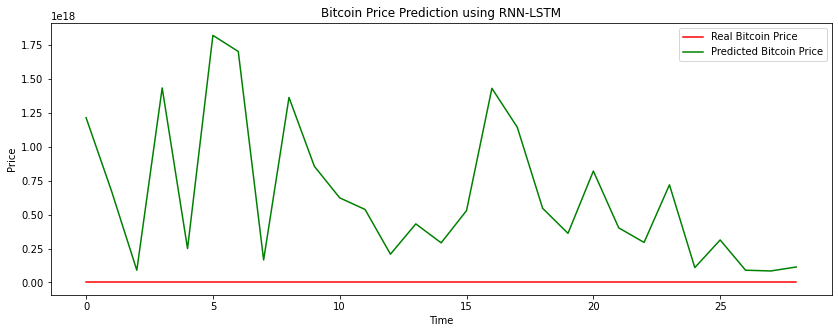

In [30]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()